In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).scalar()
print(recent_date)

2017-08-23


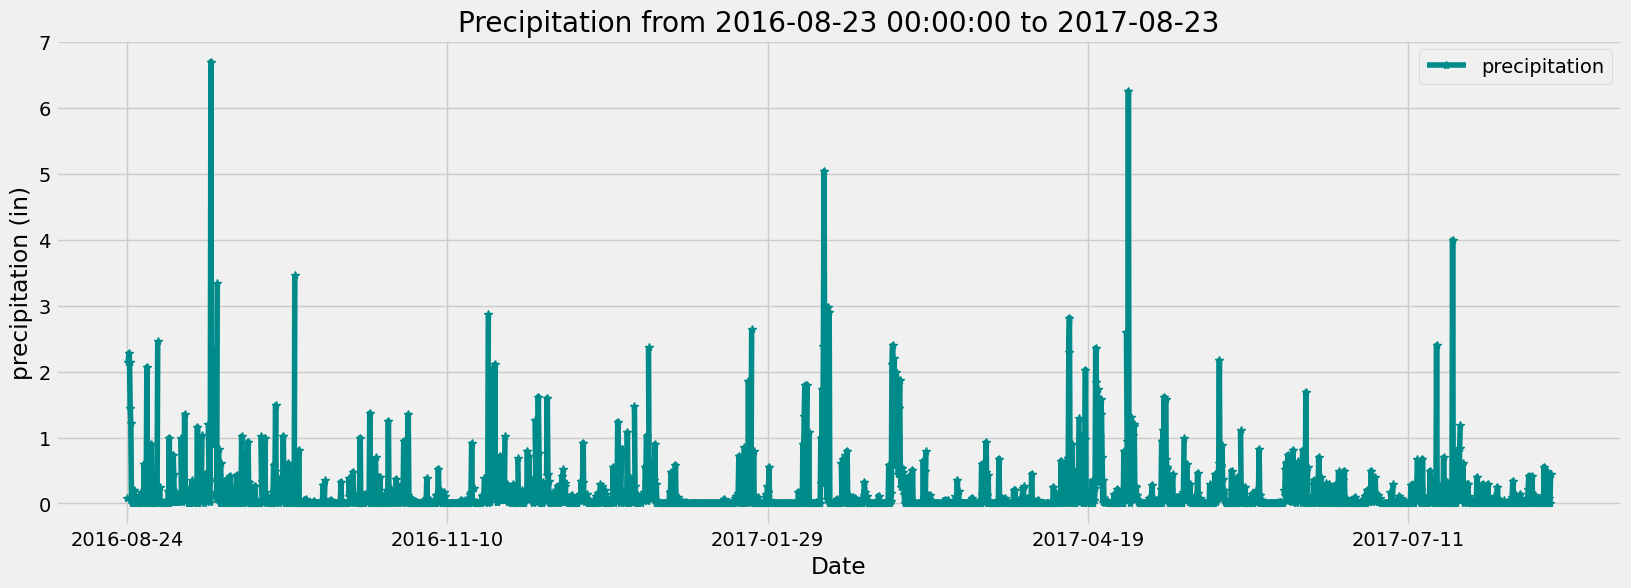

In [65]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
query_date = dt.datetime.strptime(recent_date, "%Y-%m-%d") - dt.timedelta(days=365)
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
                    filter(Measurement.date >= query_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(results, columns=["date", "precipitation"])
# Sort the dataframe by date
df.set_index("date", inplace=True)
df.sort_index(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(kind="line", figsize=(18,6), color="darkcyan", marker="*", linestyle="solid")
plt.title("Precipitation from {} to {}".format(query_date, recent_date))
plt.xlabel("Date")
plt.ylabel("precipitation (in)")
plt.legend(loc = "upper right")
plt.show()

In [38]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()


,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [39]:
# Design a query to calculate the total number of stations in the dataset
query_stations = session.execute("SELECT COUNT(DISTINCT station) AS total_stations FROM measurement")
print(query_stations.fetchone())

(9,)


In [41]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_query = session.execute("SELECT station, COUNT(*) AS count FROM measurement GROUP BY station ORDER BY count DESC")

for row in active_query:
    print(row)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
calc_query = session.execute("SELECT MIN(tobs) AS min_temp, MAX(tobs) AS max_temp, AVG(tobs) AS avg_temp FROM measurement WHERE station = 'USC00519281'")

for row in calc_query:
    print(row)

(54.0, 85.0, 71.66378066378067)


In [67]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_query = session.execute("SELECT date, tobs FROM measurement WHERE date >= DATE ('2017-08-23', '-12 months') AND station = 'USC00519281'")
most_query_list= most_query.fetchall()

In [70]:
most_query_df = pd.DataFrame(most_query_list, columns=['date', 'tobs'])
most_query_df.head()

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


Text(0, 0.5, 'Frequency')

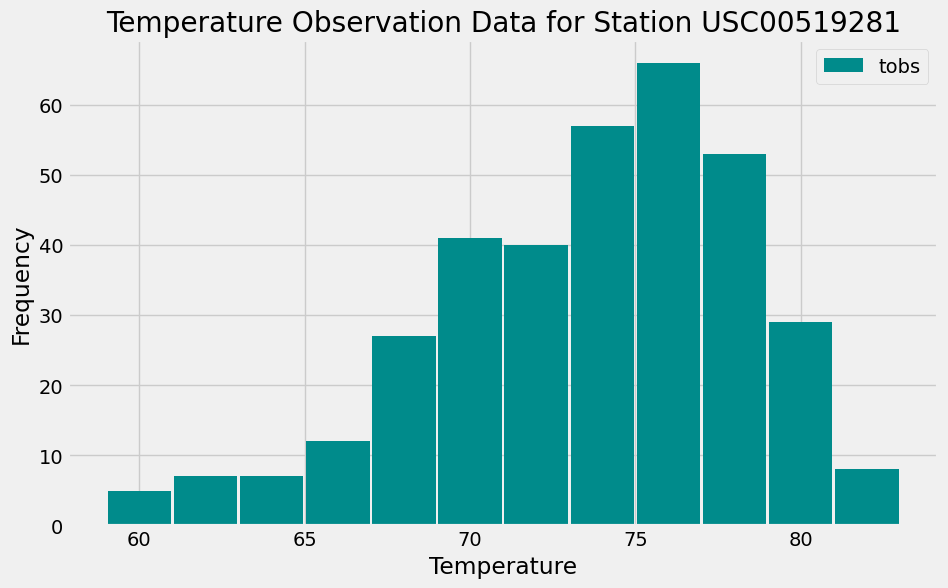

In [84]:
most_query_df.plot(kind='hist', figsize=(10, 6), bins=12, color='darkcyan', rwidth=0.96)
plt.title("Temperature Observation Data for Station USC00519281")
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close Session

In [16]:
# Close Session
session.close()